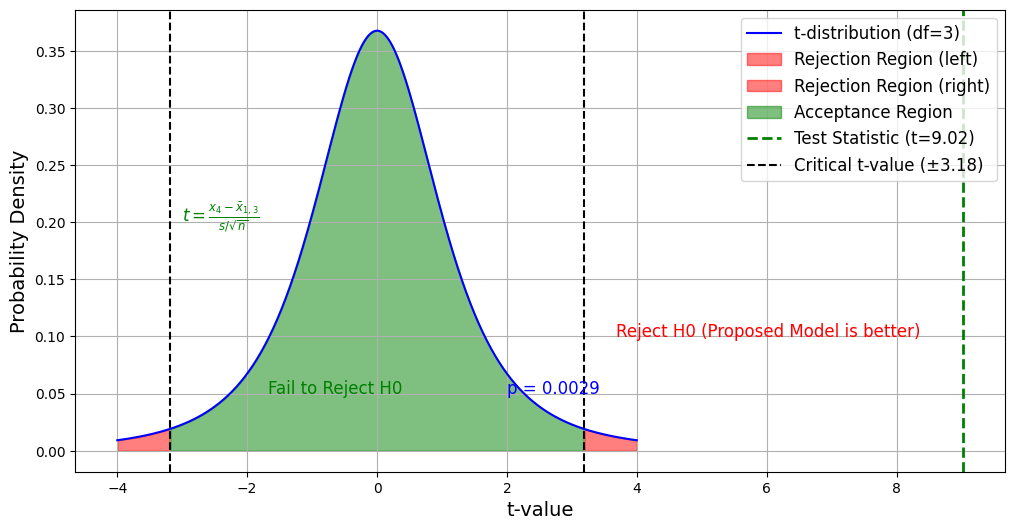

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Data from the paper
models = ["Denoising", "Fuzzy Logic", "Adversarial", "Proposed Model"]
accuracies = [89.00, 84.00, 85.00, 97.25]  # Accuracy in %
df = 3  # Degrees of freedom (n-1 for 4 groups)
alpha = 0.05  # Significance level

# Calculate mean difference for hypothesis testing
mean_diff = np.mean(accuracies)
t_statistic = (accuracies[-1] - np.mean(accuracies[:-1])) / (np.std(accuracies[:-1]) / np.sqrt(len(accuracies[:-1])))
t_critical = t.ppf(1 - alpha / 2, df)

# Calculate p-value for the test statistic
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

# Generate t-distribution data
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(12, 6))
plt.plot(x, y, color="blue", label="t-distribution (df=3)")

# Shade rejection regions
plt.fill_between(x, y, where=(x < -t_critical), color="red", alpha=0.5, label="Rejection Region (left)")
plt.fill_between(x, y, where=(x > t_critical), color="red", alpha=0.5, label="Rejection Region (right)")

# Shade acceptance regions
plt.fill_between(x, y, where=(x >= -t_critical) & (x <= t_critical), color="green", alpha=0.5, label="Acceptance Region")

# Add the test statistic
plt.axvline(t_statistic, color="green", linestyle="--", linewidth=2, label=f"Test Statistic (t={t_statistic:.2f})")

# Add critical t-value lines
plt.axvline(t_critical, color="black", linestyle="--", label=f"Critical t-value (±{t_critical:.2f})")
plt.axvline(-t_critical, color="black", linestyle="--")

# Add formulas
plt.text(-3, 0.2, r'$t = \frac{x_4 - \bar{x}_{1,3}}{s / \sqrt{n}}$', fontsize=12, color='green')
plt.text(2, 0.05, f'p = {p_value:.4f}', fontsize=12, color='blue')

# Add hypothesis acceptance and rejection explanations
plt.text(t_critical + 0.5, 0.1, 'Reject H0 (Proposed Model is better)', fontsize=12, color='red')
#plt.text(-t_critical - 2, 0.1, 'Reject H0 (Proposed Model is better)', fontsize=8, color='red')
#plt.text(t_critical - 1.5, 0.05, 'Fail to Reject H0', fontsize=8, color='green')
plt.text(-t_critical + 1.5, 0.05, 'Fail to Reject H0', fontsize=12, color='green')

# Add labels, title, legend, and grid
#plt.title("Hypothesis Testing for Accuracy Improvement", fontsize=16)
plt.xlabel("t-value", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display the graph
plt.show()
